In [1]:
import datetime
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import scanpy as sc
sc.logging.print_memory_usage()
sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi = 300, dpi_save = 300)
sc.logging.print_header()

from matplotlib.pyplot import rc_context

Memory usage: current 0.22 GB, difference +0.22 GB
scanpy==1.10.4 anndata==0.11.3 umap==0.5.7 numpy==1.26.4 scipy==1.15.1 pandas==2.0.3 scikit-learn==1.6.1 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.13


In [3]:
# add the utility functions folder to PATH
sys.path.append(os.path.abspath("../packages"))
from db_dev.helper import *

In [4]:
import matplotlib as mpl
mpl.rc("font", family = "Arial")
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42


In [5]:
home_dir = os.path.expanduser("~")
current_directory = os.getcwd()

adata = sc.read_h5ad(current_directory+"/backups/aml_cells_umap_12062x37733_241028_19h20.h5ad")

In [6]:
#Loading obs
current_directory = os.getcwd()
# overwrite obs with the most recent version
filename = current_directory+"/backups/aml_clustering_leiden_1.0_sub_obs_12062x28_241107_09h59.npz"
encoding = "latin1"

with np.load(filename, encoding=encoding, allow_pickle = True) as f:
    obs = pd.DataFrame(**f)

In [7]:
# loading obs onto adata
adata.obs["leiden_1.0_sub"] = obs["leiden_1.0_sub"]
# loading obs onto adata
adata.obs["leiden_1.0"] = obs["leiden_1.0"]

In [8]:
adata.layers["counts"]

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 23787774 stored elements and shape (12062, 37733)>

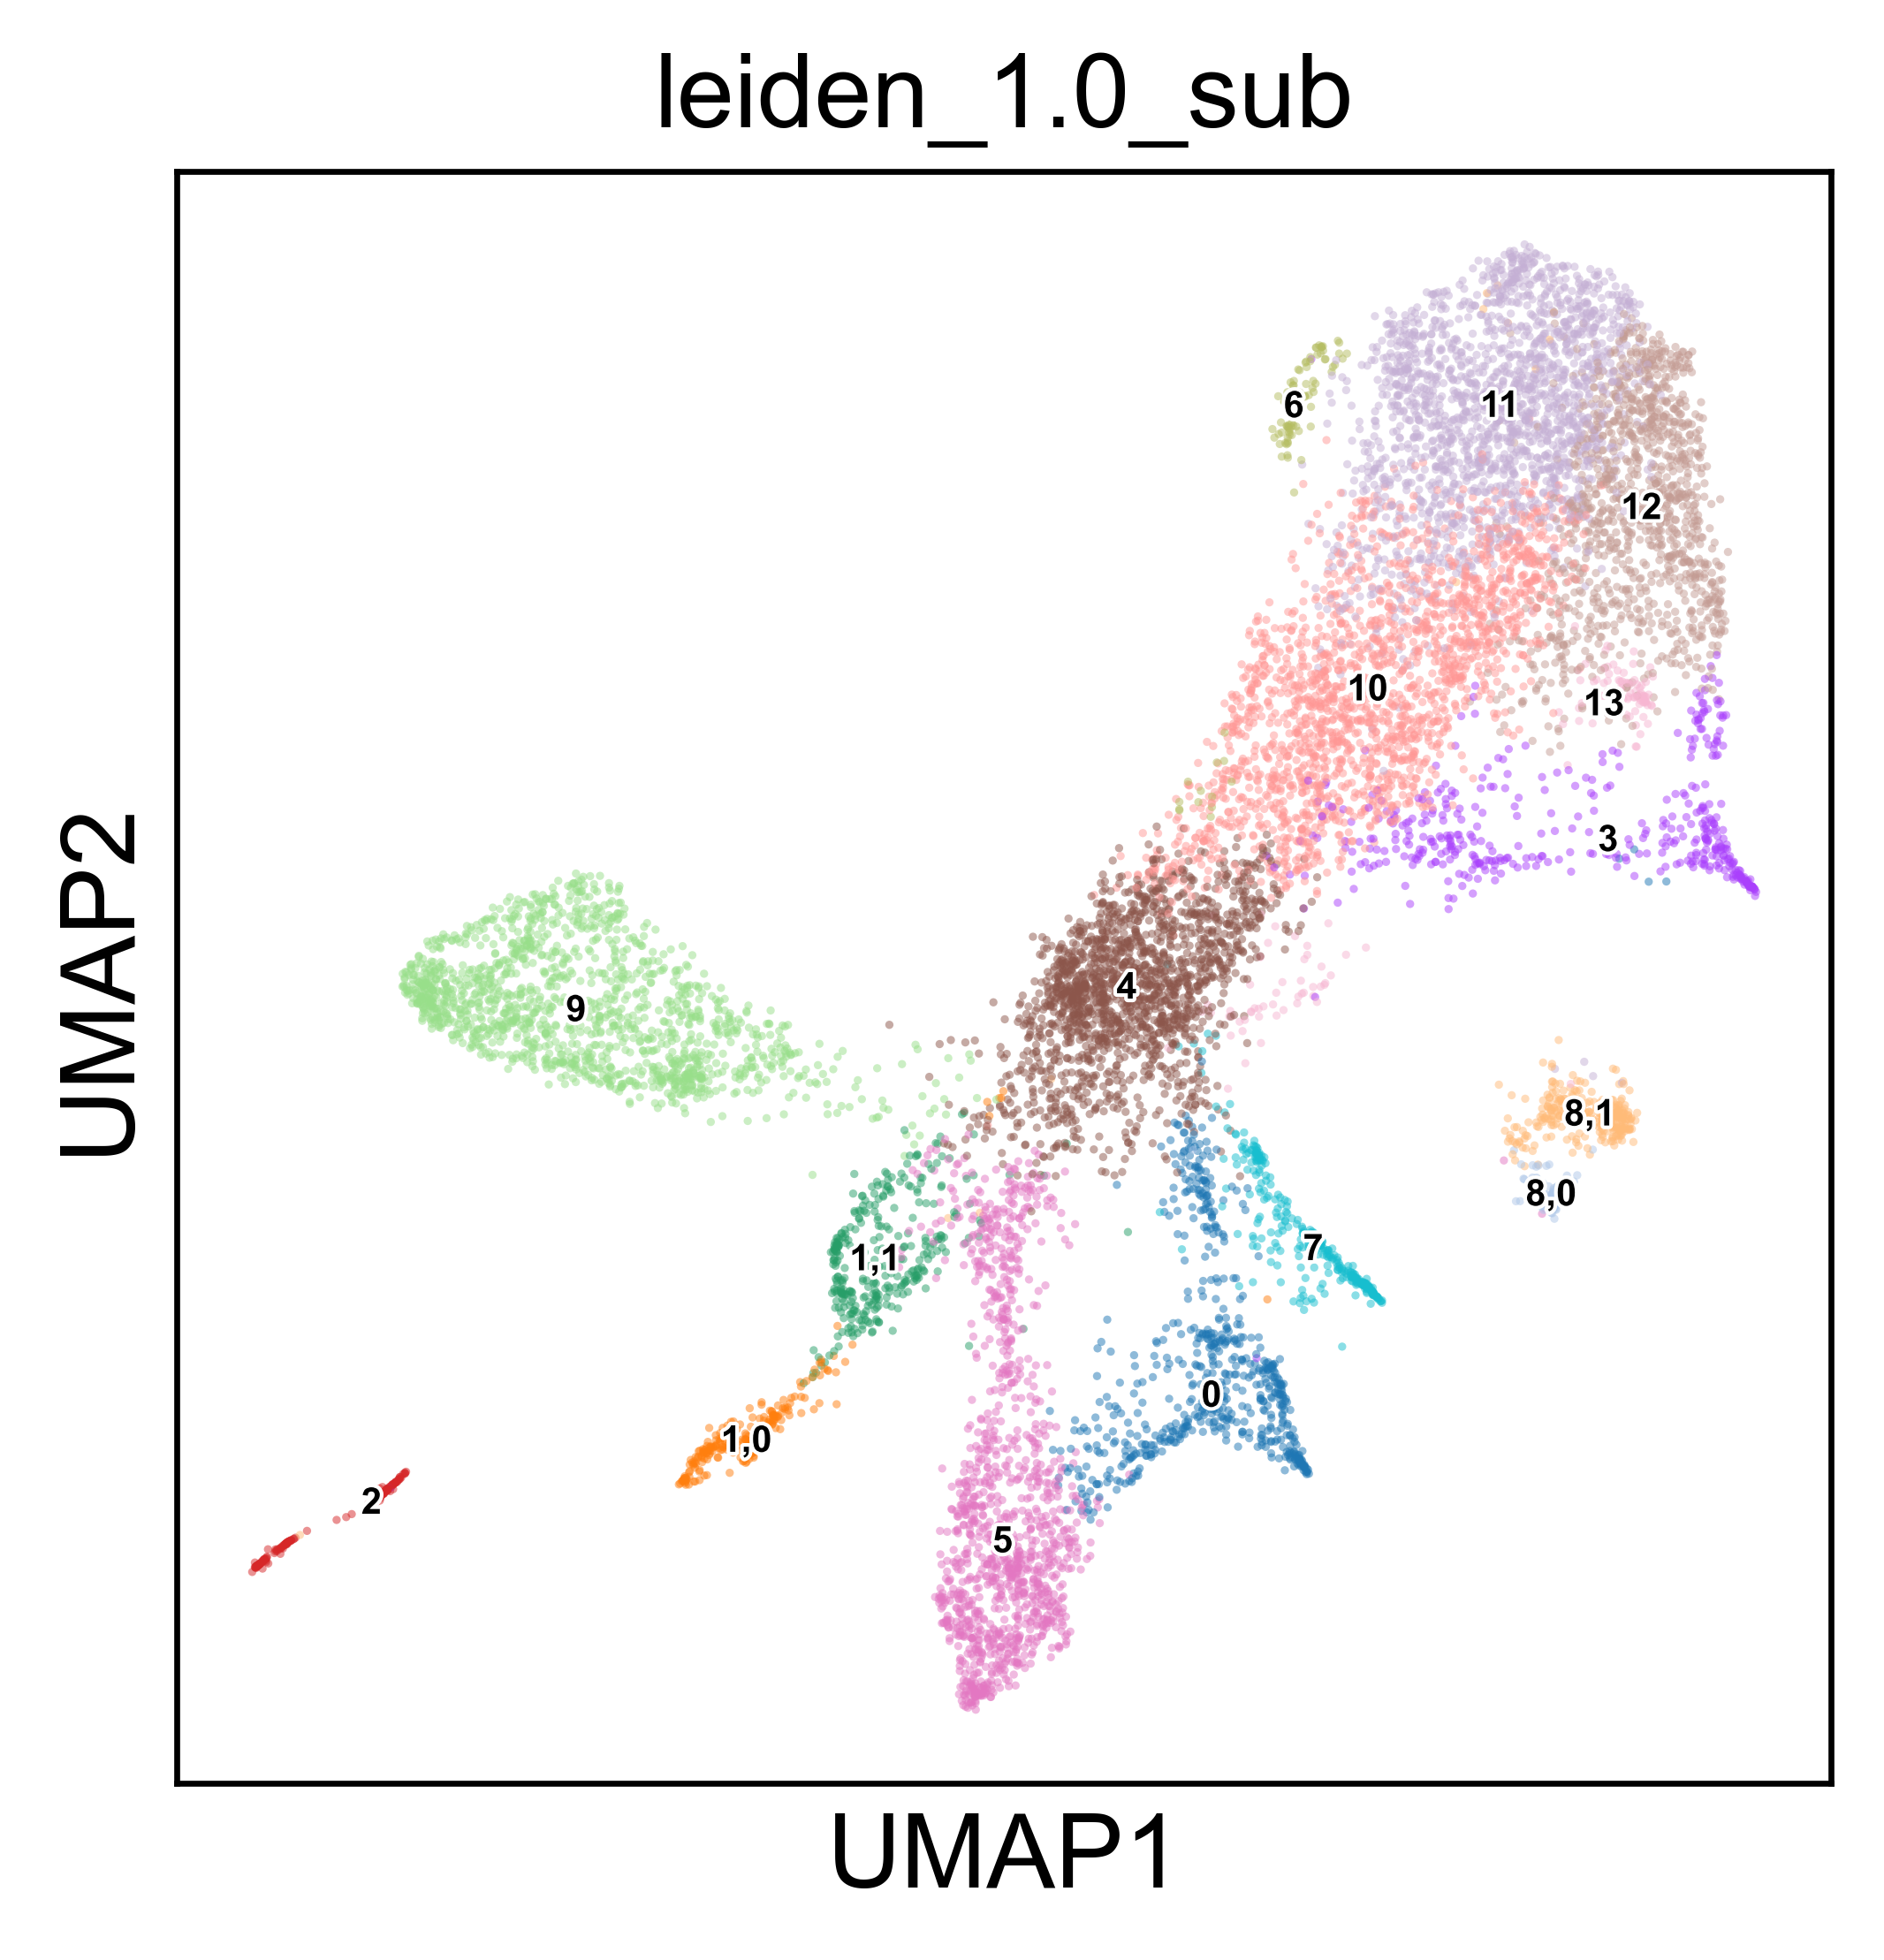

In [43]:
sc.pl.umap(adata, color = ["leiden_1.0_sub"], 
           alpha = 0.5, 
           wspace = 0.5,
           ncols = 3,
           s = 5, 
           legend_loc = "on data", legend_fontsize = 5, legend_fontoutline = True)

In [21]:
for i, x in enumerate(adata.obs["leiden_1.0_sub"].unique()): 
    print(f'"{x}":"N/A ({x})",')

"0,0":"N/A (0,0)",
"1,0":"N/A (1,0)",
"2":"N/A (2)",
"1,1":"N/A (1,1)",
"0,3":"N/A (0,3)",
"7,0":"N/A (7,0)",
"3":"N/A (3)",
"5":"N/A (5)",
"1,2":"N/A (1,2)",
"8":"N/A (8)",
"10,0":"N/A (10,0)",
"4":"N/A (4)",
"10,1":"N/A (10,1)",
"7,1":"N/A (7,1)",
"6":"N/A (6)",
"0,4":"N/A (0,4)",
"9":"N/A (9)",
"1,3":"N/A (1,3)",
"0,1":"N/A (0,1)",
"11":"N/A (11)",
"0,2":"N/A (0,2)",


In [15]:
cell_type_dict = {


#### AML cells
"5":"AML cells 1",
"12":"AML cells 4",
"7":"AML cells 2",
"9":"AML cells 3",
"9":"AML cells 3",
"6":"AML cells 4",
"10":"AML cells 4",
"11":"AML cells 4",
"1,1":"AML cells 5",
"13":"AML cells 6",
"8,0":"AML cells 7",
"8,1":"AML cells 7",
"0":"AML cells 8",
"1,0":"AML cells 9",
"3":"AML cells 10",
}
#


cell_type_color_palette = {
# orange
"AML cells 2": "#9e5423",
"AML cells 4": "#eb8f1e",
"AML cells 1": "#73472a",
"AML cells 3": "#ab3803",
"AML cells 5": "#f2621f",
"AML cells 6": "#ad0e0e",
"AML cells 7": "#cc1c00",
"AML cells 8": "#db5a46",
"AML cells 9": "#b85c38",
"AML cells 10": "#e07c57",

"AML Monocytes 1": "#8a0303",
"AML Monocytes 2": "#ff7043",

}


In [16]:
adata.obs["cell_type_a"] = adata.obs["leiden_1.0_sub"].map(cell_type_dict).astype("category")

/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


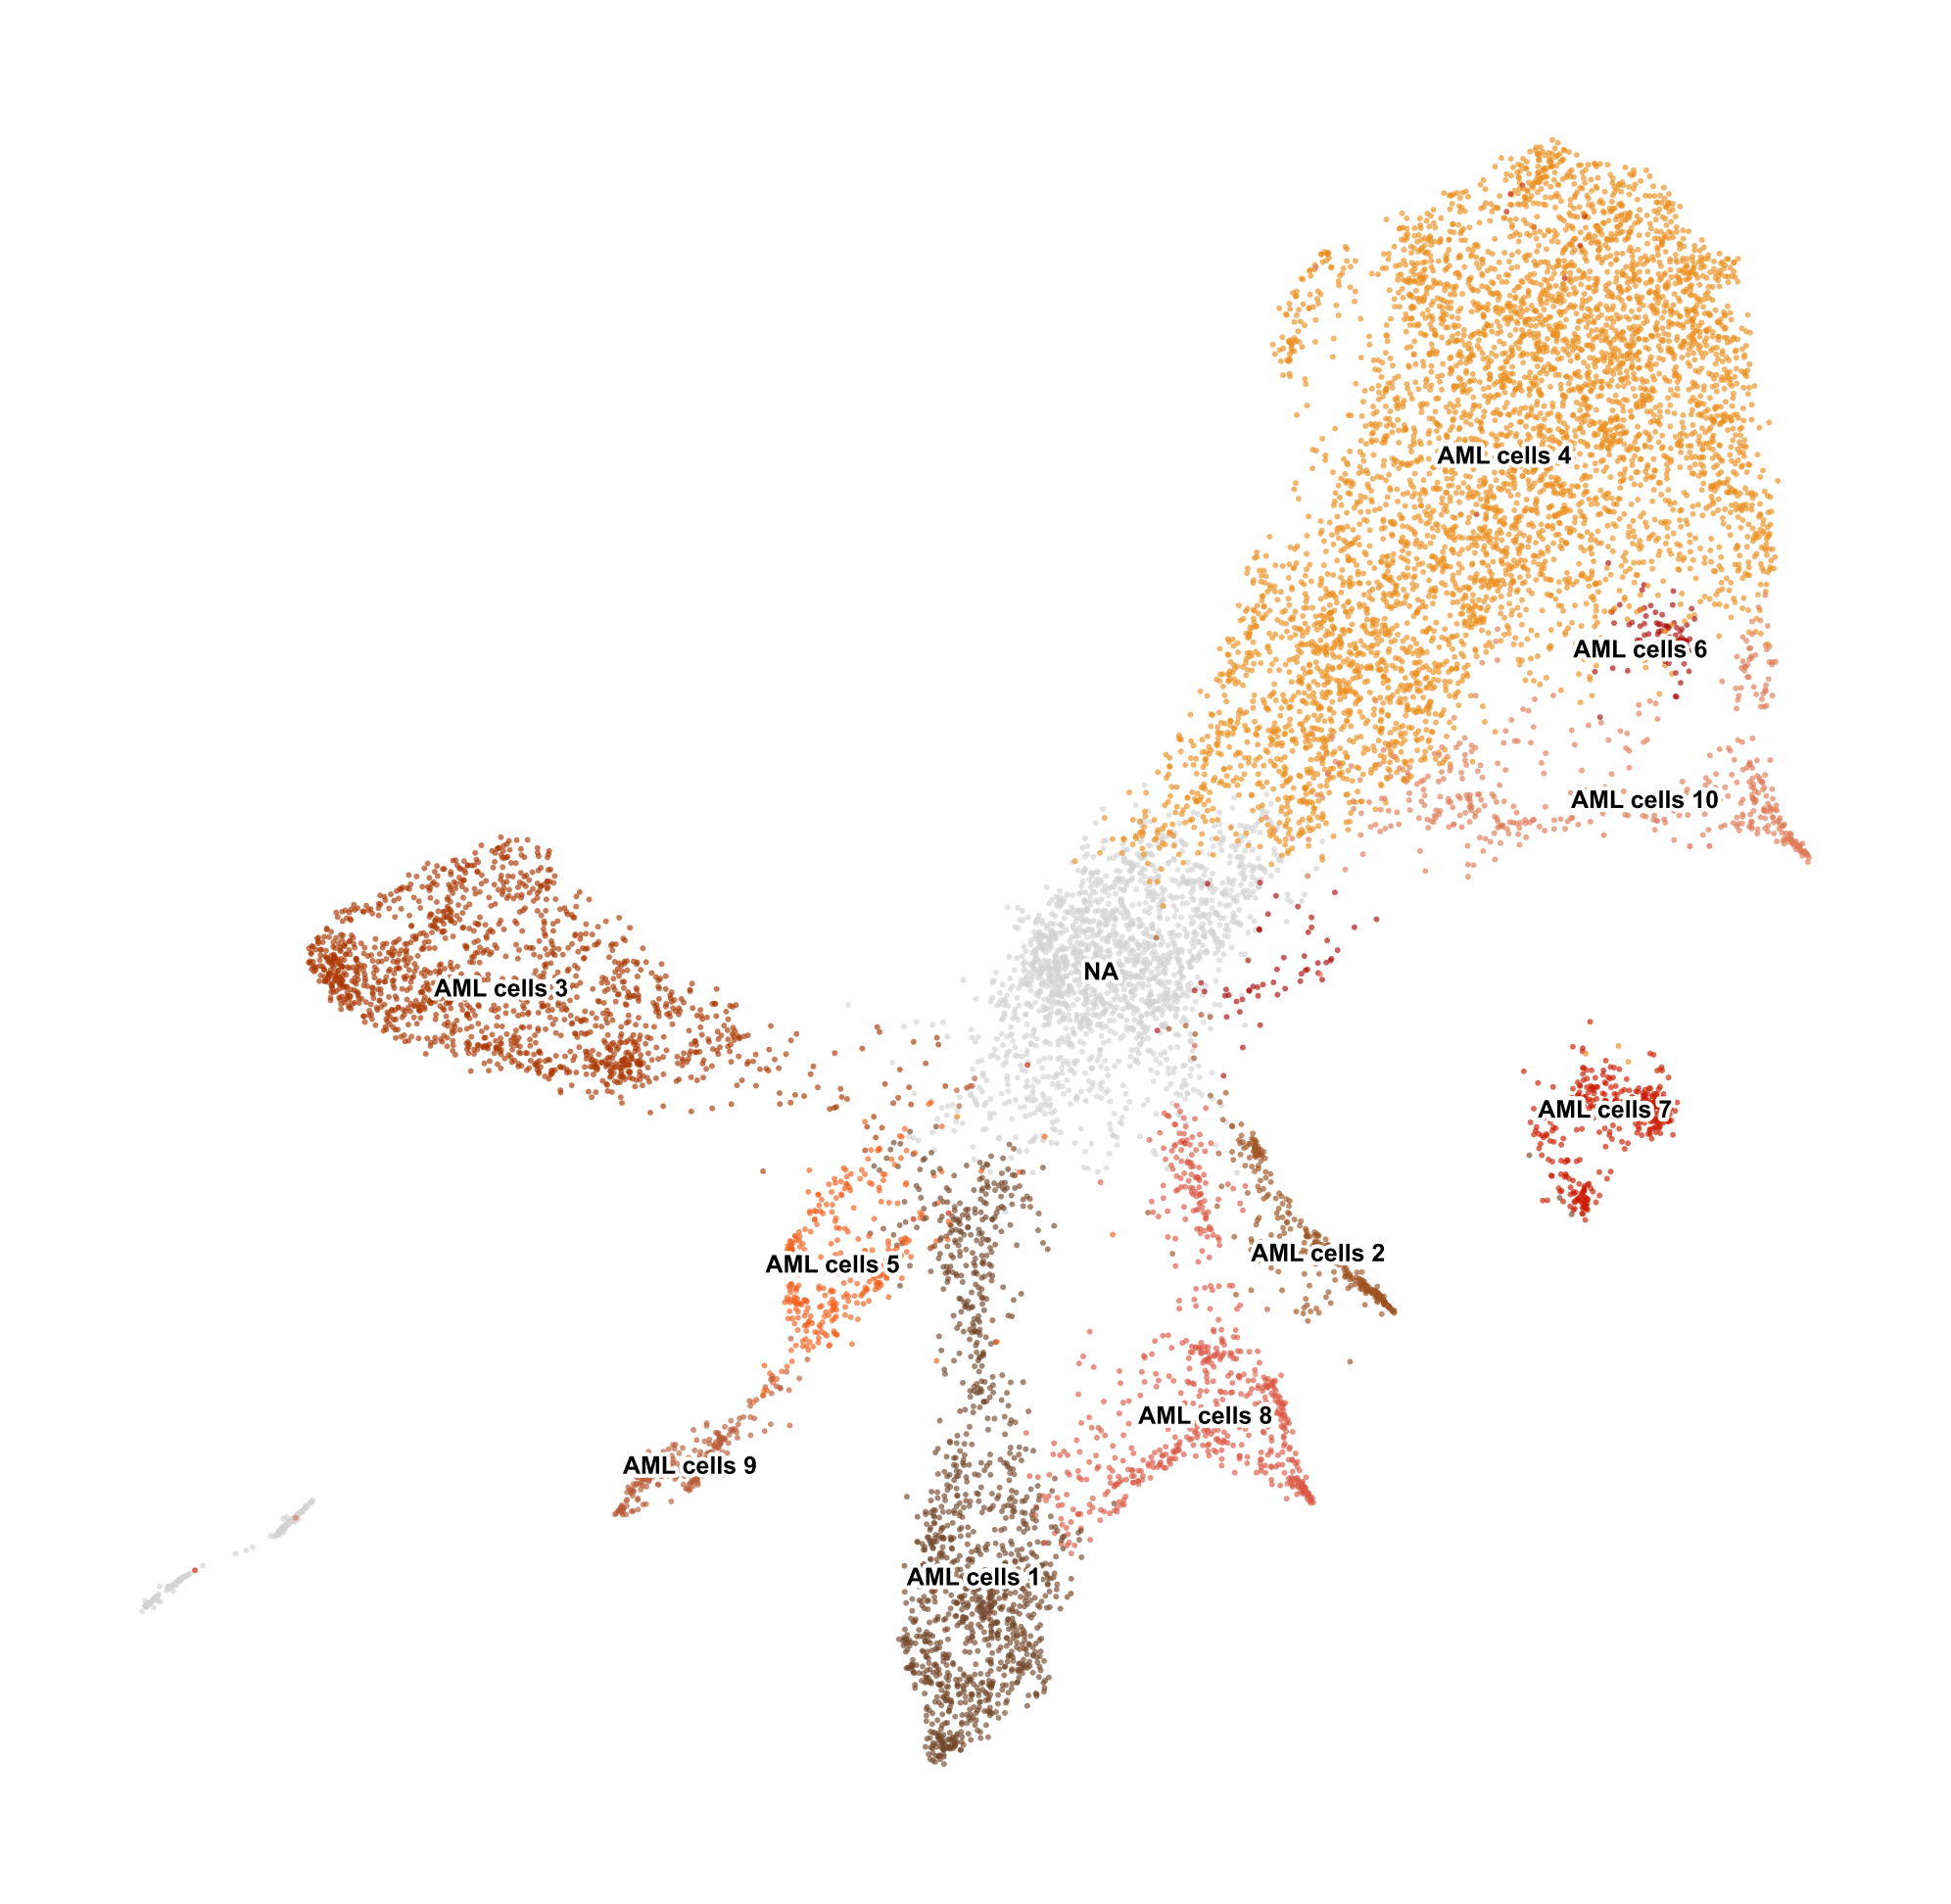

In [17]:
# To randomize cells
np.random.seed(69)
random_indices = np.random.permutation(list(range(adata.shape[0])))


sc.pl.umap(adata[random_indices, :], color = "cell_type_a", 
           alpha = 0.66, 
           wspace = 0.5,
           ncols = 3,
           s = 2, 
           frameon = False, title = "",
           legend_loc = "on data", legend_fontsize = 3, legend_fontoutline = True, 
           palette = cell_type_color_palette, #{"Plasma cells": "red"}, 
           save = "_cell_type_only_aml_v2.png")

In [19]:
# saving annotated recovered adata with raw, log-norm and scaled log-norm counts

current_directory = os.getcwd()
fname1 = current_directory+"/backups/aml_1.0_sub_DGE_v2_annotation_%dx%d_%s.h5ad"%(adata.shape[0],adata.shape[1],now())
print(fname1)
adata.write(fname1)

/Users/denis/microtechnologies/sequencing/240710_BB2_BB3/backups/aml_1.0_sub_DGE_v2_annotation_12062x37733_250117_11h22.h5ad


In [20]:
start = time.time()
# write the pandas dataframe under adata.obs as a separate file
meta = adata.obs
#fname2 = 'backups/obs_info_raw_%dx%d_%s'%(meta.shape[0],meta.shape[1],now())
fname2 = current_directory+"/backups/aml_leiden_1.0_sub_annotation_obs_%dx%d_%s"%(meta.shape[0],meta.shape[1],now())
print(fname2)
save_df(meta,fname2)
print(time.time()-start)



/Users/denis/microtechnologies/sequencing/240710_BB2_BB3/backups/aml_leiden_1.0_sub_annotation_obs_12062x31_250117_11h22
0.14221620559692383
